# Importing Builtin Assets
All of Menpo's Input/Output functionality is stored in the `io` package. We frequently import this package as `mio`

In [1]:
import menpo.io as mio

Menpo has a small cache of test assets shipped with it for example and testing purposes. You can get the filepath of this folder on your system easily

In [2]:
data_dir = mio.data_dir_path()
print('Shipped data is at {}'.format(data_dir))
import os
os.listdir(str(data_dir))

Shipped data is at /home/pts08/gits/menpo/menpo/data


['einstein.pts',
 'takeo.ppm',
 'tongue.pts',
 'breakingbad.jpg',
 'tongue.jpg',
 'menpo_thumbnail.jpg',
 'lenna.png',
 'breakingbad.pts',
 'takeo.pts',
 'einstein.jpg',
 'lenna.ljson']

A convienience function is provided in the `io` package to make life easier. Note that it skips folders (e.g. `logos`).

In [3]:
builtin_assets = mio.ls_builtin_assets()
print(builtin_assets)

['einstein.pts', 'takeo.ppm', 'tongue.pts', 'breakingbad.jpg', 'tongue.jpg', 'menpo_thumbnail.jpg', 'lenna.png', 'breakingbad.pts', 'takeo.pts', 'einstein.jpg', 'lenna.ljson']


`data_path_to(filename)` can be used to get a path to examples from the folder. For instance, let's say you want to get a path to the `einstein.jpg` file... 

In [4]:
einstein_path = mio.data_path_to('einstein.jpg')
print('Einstein lives at {}'.format(einstein_path))

Einstein lives at /home/pts08/gits/menpo/menpo/data/einstein.jpg


The 6 `menpo.io` importing functions can be broken into two groups


*Single asset importers*

- `import_image`
- `import_landmark_file`
- `import_builtin_asset`
- `import_pickle`


*Multi asset importers*

- `import_images`
- `import_landmark_files`
- `import_pickles`

**Single Asset Importers**

Let's start by seeing how the basic single importers work. How about provided images?

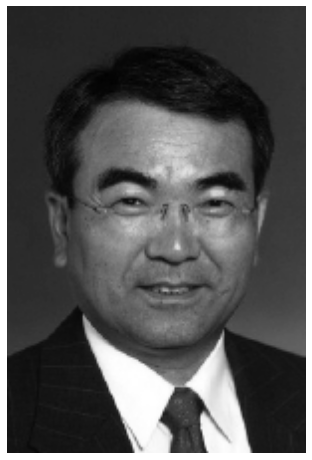

In [5]:
%matplotlib inline
# builtin asset handles both images and meshes
takeo = mio.import_builtin_asset('takeo.ppm') 
takeo.view();

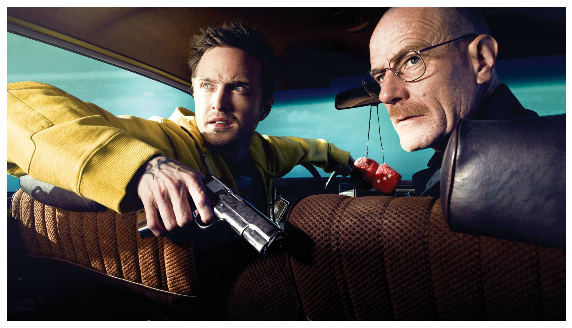

In [6]:
bb = mio.import_builtin_asset('breakingbad.jpg')
bb.view();

Note that landmark files are automatically detected by the IO module and applied to assets. For instance, the *breakingbad.jpg* had alongside it a *breakingbad.pts* file...

breaking bad assets are: ['breakingbad.jpg', 'breakingbad.pts']
LandmarkManager: n_groups: 1
(PTS): LandmarkGroup: n_labels: 1, n_points: 68


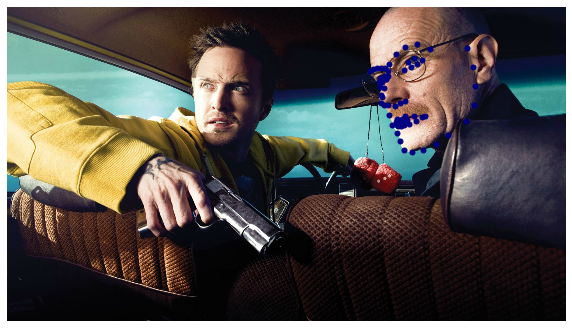

In [7]:
print('breaking bad assets are: {}'.format(
[a for a in builtin_assets if a.startswith('breakingbad')]))
print(bb.landmarks)
bb.view_landmarks()

Of course, if we were feeling more verbose we could have used the `import_image(filepath)` function having found the breaking bad image for ourselves

Walter White lives at /home/pts08/gits/menpo/menpo/data/breakingbad.jpg


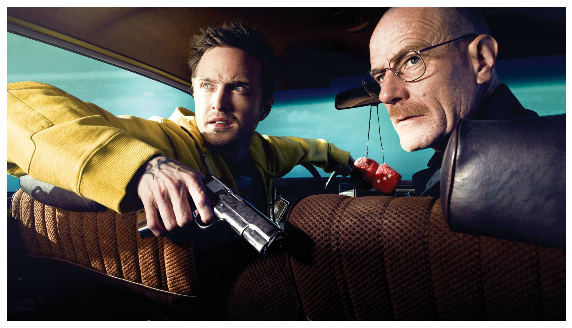

In [8]:
new_mexico = mio.data_path_to('breakingbad.jpg')
print('Walter White lives at {}'.format(new_mexico))
walter_2 = mio.import_image(new_mexico)
# exactly the same!
walter_2.view();

`import_pickle` has a similar functionality. All three importers we have looked at so far are for retrieving single items, and expect exact filepaths. If you provide an invalid path, or a path to something that can't be imported, you will get a `ValueError` explaining what went wrong

In [9]:
try:
    mio.import_image('/I/bet/this/isnt/an/image/on/your/system.jpg')
except ValueError as e:
    print(e)

/I/bet/this/isnt/an/image/on/your/system.jpg is not a file


**Multi Asset importers**


The final three `import_*` functions are the bulk importers. All three are **LazyLists**, which means they do not actually import the files they find execution time, but instead return a list that can indexed as normal and will import the asset upon indexing. They also support `for` looping. All three also expect a glob pattern to match against.

In [10]:
%%time
all_data_files = mio.data_dir_path() / '*'
print('glob to find all inbuilt files: {}'.format(all_data_files))
# Note how this returns immediately - note the total time taken
images_lazy = mio.import_images(all_data_files)
# And it has a length just like a normal list
print('images_lazy contains {} items.'.format(len(images_lazy)))

glob to find all inbuilt files: /home/pts08/gits/menpo/menpo/data/*
images_lazy contains 6 items.
CPU times: user 0 ns, sys: 3.45 ms, total: 3.45 ms
Wall time: 1.14 ms


Note that as we used `import_images()` all images in the data folder were returned by the glo. If we want to import them immediately, we can wrap the LazyList in a list constructor.

In [11]:
%%time
# This actually imports all of the images - note the total time taken
images = list(mio.import_images(all_data_files))
for image in images:
    print(image)

1920W x 1080H 2D Image with 3 channels
817W x 1024H 2D Image with 1 channel
512W x 512H 2D Image with 3 channels
153W x 200H 2D Image with 3 channels
150W x 225H 2D Image with 3 channels
940W x 940H 2D Image with 3 channels
CPU times: user 105 ms, sys: 8.05 ms, total: 113 ms
Wall time: 112 ms


Importing assets lazily has a few important advantages. The first is that it makes investigation of the assets much simpler. Since the list does not perform the importing immediately, randomly indexing into a Lazy List is free (excluding the cost of importing - which you would pay regardless.

In [12]:
# This imports the image
image = images_lazy[0]

This is particular useful if you want to investigate a dataset visually!

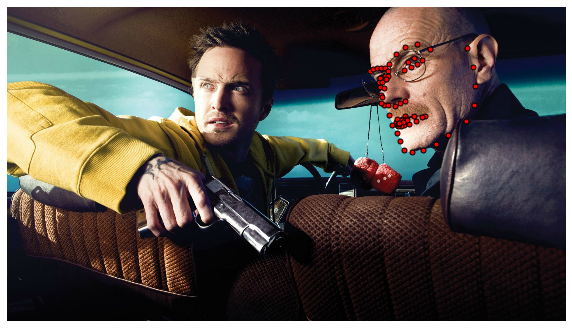

In [13]:
from menpowidgets import visualize_images


# Images are reported as you view them.
visualize_images(images_lazy)

Or we can use a Python generator to be selective on import. Often when importing large datasets of images we want to crop all the images in some way. It would be problematic to import all the images into memory at maximum size and then crop them en masse. With the generator we can crop as we go, and keep memory usage low. We also get a pretty progress printing!

In [14]:
cropped_images = [image.crop((0, 0), (100, 100)) for image in 
                  mio.import_images(all_data_files, as_generator=True, verbose=True)]
for image in cropped_images:
    print(image)

Importing assets: [==========] 100% (6/6) - done.                               
100W x 100H 2D Image with 3 channels
100W x 100H 2D Image with 1 channel
100W x 100H 2D Image with 3 channels
100W x 100H 2D Image with 3 channels
100W x 100H 2D Image with 3 channels
100W x 100H 2D Image with 3 channels


Of course, `import_landmark_files()` follows exactly the same rules

In [15]:
%%time
landmarks_lazy = mio.import_landmark_files(all_data_files)
print('landmarks_lazy contains {} items.'.format(len(landmarks_lazy)))

landmarks_lazy contains 5 items.
CPU times: user 0 ns, sys: 3.44 ms, total: 3.44 ms
Wall time: 814 µs


One great advantage of the LazyList is that it makes functional programming much simpler. All LazyLists have a ``map`` method that builds a new LazyList that wraps the previous one. This means that the ``map`` method will return immediately, but when the list is indexed the function is applied to the result of the list index!

In [16]:
%%time
def crop_image(image):
    return image.crop_to_landmarks()

cropped_images = images_lazy.map(crop_image)

CPU times: user 70 µs, sys: 7 µs, total: 77 µs
Wall time: 87 µs


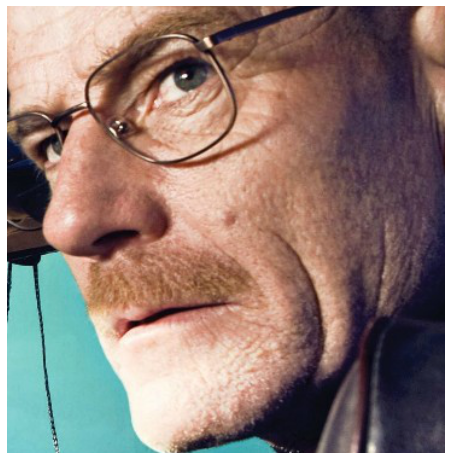

In [17]:
# Import the image - notice it is now cropped!
cropped_images[0].view()